In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedKFold
from scipy import sparse
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
from datetime import datetime

In [2]:
train_abbr=pd.read_excel("train_data.xlsx",encoding='ISO-8859-1')
train=pd.read_excel("train_data.xlsx",encoding='ISO-8859-1')
test_abbr=pd.read_excel("test_data.xlsx",encoding='ISO-8859-1')
test=pd.read_excel("test_data.xlsx",encoding='ISO-8859-1')
test_sub=pd.read_excel("result.xlsx",encoding='ISO-8859-1')

In [3]:
test.shape

(59, 78)

In [4]:
test_sub.shape

(0, 0)

In [5]:
train.shape

(672, 78)

In [6]:
train.head()

,date,time,bloodG,heart rate,Blood oxygen,r_value,LED_1_1st_AC,LED_1_1st_DC,LED_2_1st_AC,LED_2_1st_DC,LED_3_1st_AC,LED_3_1st_DC,LED_4_1st_AC,LED_4_1st_DC,LED_5_1st_AC,LED_5_1st_DC,LED_6_1st_AC,LED_6_1st_DC,LED_1_2nd_AC,LED_1_2nd_DC,LED_2_2nd_AC,LED_2_2nd_DC,LED_3_2nd_AC,LED_3_2nd_DC,LED_4_2nd_AC,LED_4_2nd_DC,LED_5_2nd_AC,LED_5_2nd_DC,LED_6_2nd_AC,LED_6_2nd_DC,LED_1_1st_AC_norm,LED_2_1st_AC_norm,LED_3_1st_AC_norm,LED_4_1st_AC_norm,LED_5_1st_AC_norm,LED_6_1st_AC_norm,LED_1_2nd_AC_norm,LED_2_2nd_AC_norm,LED_3_2nd_AC_norm,LED_4_2nd_AC_norm,LED_5_2nd_AC_norm,LED_6_2nd_AC_norm,T_S1_start,T_S1_end,T_S1_ave,T_S2_start,T_S2_end,T_S2_ave,T_S3_start,T_S3_end,T_S3_ave,H_S1_start,H_S1_end,H_S1_ave,H_S2_start,H_S2_end,H_S2_ave,H_S3_start,H_S3_end,H_S3_ave,T_S1_0~3s,T_S1_3~6s,T_S1_6~9s,T_S2_0~3s,T_S2_3~6s,T_S2_6~9s,T_S3_0~3s,T_S3_3~6s,T_S3_6~9s,H_S1_0~3s,H_S1_3~6s,H_S1_6~9s,H_S2_0~3s,H_S2_3~6s,H_S2_6~9s,H_S3_0~3s,H_S3_3~6s,H_S3_6~9s
0,2022-01-22,08:46:11,6.05,81.447964,98.311931,0.527882,9.736111,283.75,6.479167,283.75,4.388889,429.5,2.444444,160.25,26.333333,466.00,63.145833,627.75,58.395833,1923.25,42.187500,1921.50,11.597222,1602.75,6.277778,680.50,157.625000,3016.00,378.243542,3760.2225,5.928372,3.945201,4.045124,0.840606,26.333333,85.063942,37.237993,26.877746,6.162947,1.416455,157.625000,471.578208,27.3975,27.5600,27.491154,26.6275,26.7475,26.682404,24.6800,25.0325,24.880048,83.9975,82.1675,82.859038,95.8300,95.7675,95.824519,44.5200,44.7400,44.658846,0.021667,0.016667,0.015833,-0.003333,0.022500,0.020833,0.032500,0.051667,0.033333,-0.238333,-0.212500,-0.159167,0.011667,-0.019167,-0.013333,0.043333,0.006667,0.023333
1,2022-01-22,08:46:30,6.05,81.712062,98.182446,0.535260,12.550000,293.00,7.978571,296.00,5.500000,432.0,2.614286,160.50,30.721429,471.25,70.578571,615.75,71.500000,1970.50,49.707143,1988.00,16.571429,1610.00,7.642857,682.00,186.857143,3047.00,422.765643,3688.3425,7.802971,5.011474,5.041910,0.890383,30.721429,92.220171,46.239170,32.431178,8.756154,1.710676,186.857143,511.750735,27.8000,27.9000,27.855817,26.9075,27.0000,26.953413,25.1750,25.4025,25.328173,80.6725,80.3125,80.461490,95.6550,95.6550,95.663846,45.2225,45.2350,45.272356,0.015000,0.002500,0.015833,0.009167,0.006667,0.015000,0.025000,0.038333,0.012500,-0.039167,-0.037500,-0.043333,0.009167,0.006667,-0.015833,0.005833,0.019167,-0.020833
2,2022-01-22,08:46:54,6.05,85.308057,98.646345,0.507359,5.450000,298.25,4.714286,301.00,2.985714,429.5,1.950000,160.25,18.900000,487.50,44.800000,640.00,37.450000,2004.00,25.150000,2021.25,9.428571,1603.25,3.450000,678.00,105.700000,3145.00,268.352000,3833.6000,3.334282,2.910769,2.630491,0.641000,18.900000,58.814359,23.863211,16.163573,4.806473,0.743752,105.700000,327.107862,27.9775,28.0100,27.992644,27.0800,27.1550,27.118558,25.4600,25.6675,25.577885,80.0325,79.9875,80.001731,95.5700,95.7775,95.655192,45.4850,45.5400,45.518173,0.001667,0.007500,0.001667,0.005000,0.010833,0.009167,0.018333,0.027500,0.023333,-0.009167,-0.009167,0.003333,0.004167,0.017500,0.047500,0.005000,0.003333,0.010000
3,2022-01-22,09:35:20,11.85,93.333333,96.007713,0.632862,14.390625,273.00,8.812500,288.75,5.859375,493.0,4.156250,184.50,41.375000,471.50,73.437500,542.25,83.046875,1848.25,57.812500,1944.00,21.062500,1810.50,8.843750,759.75,243.875000,3043.75,437.250000,3466.0000,8.332218,5.396839,6.126558,1.626359,41.375000,84.457019,50.428382,36.924025,12.528511,2.207487,243.875000,497.908337,28.1925,28.4950,28.355962,27.9575,28.2075,28.153750,26.0825,26.3225,26.214135,72.7400,78.7875,77.483750,85.2650,92.8900,90.517933,41.2550,42.8150,42.272260,0.030000,0.035833,0.035000,0.050000,0.026667,0.006667,0.019167,0.030833,0.030000,1.441667,0.439167,0.135000,1.333333,0.762500,0.445833,0.224167,0.181667,0.114167
4,2022-01-22,09:35:41,11.85,98.765432,95.692254,0.644459,9.935484,282.50,7.669355,301.50,7.129032,492.0,3.919355,185.50,34.564516,463.50,61.185484,543.75,69.919355,1916.00,51.000000,2028.25,24.596774,1808.00,9.354839,763.50,201.201613,2997.50,363.225806,3466.5000,

In [7]:
train.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 78 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               672 non-null    datetime64[ns]
 1   time               672 non-null    object        
 2   bloodG             672 non-null    float64       
 3   heart rate         672 non-null    float64       
 4   Blood oxygen       672 non-null    float64       
 5   r_value            672 non-null    float64       
 6   LED_1_1st_AC       672 non-null    float64       
 7   LED_1_1st_DC       672 non-null    float64       
 8   LED_2_1st_AC       672 non-null    float64       
 9   LED_2_1st_DC       672 non-null    float64       
 10  LED_3_1st_AC       672 non-null    float64       
 11  LED_3_1st_DC       672 non-null    float64       
 12  LED_4_1st_AC       672 non-null    float64       
 13  LED_4_1st_DC       672 non-null    float64       
 14  LED_5_1st_

In [9]:
y_train_=train["bloodG"]

In [10]:
y_train_.value_counts()

11.70    34
10.20    29
11.85    24
12.25    24
13.70    20
9.80     20
8.55     19
6.00     19
5.55     18
7.40     18
12.15    16
9.45     16
5.50     16
11.45    12
10.65    12
11.40    12
5.30     12
5.15     12
7.85     12
8.45     12
7.55     11
9.60     10
10.15    10
12.85    10
12.40    10
9.05     10
10.95    10
10.05    10
11.30    10
11.50    10
6.50     10
12.70    10
8.70     10
13.20    10
10.25    10
12.45    10
11.90    10
8.60     10
9.30     10
5.65     10
5.45     10
7.80     10
8.80     10
8.75     10
5.20      9
14.10     8
14.20     8
6.95      8
5.25      8
6.05      6
8.50      6
9.55      5
8.40      5
10.75     2
10.55     2
5.70      2
6.20      2
8.85      2
5.05      1
Name: bloodG, dtype: int64

In [11]:
y_train_=y_train_.map(lambda x:3 if x==-8 else x)

In [12]:
data=pd.concat([train,test],axis=0,ignore_index=True)

In [13]:
data.shape

(731, 78)

In [14]:
print(data)

          date      time  bloodG  heart rate  Blood oxygen   r_value  \
0   2022-01-22  08:46:11    6.05   81.447964     98.311931  0.527882   
1   2022-01-22  08:46:30    6.05   81.712062     98.182446  0.535260   
2   2022-01-22  08:46:54    6.05   85.308057     98.646345  0.507359   
3   2022-01-22  09:35:20   11.85   93.333333     96.007713  0.632862   
4   2022-01-22  09:35:41   11.85   98.765432     95.692254  0.644459   
5   2022-01-22  09:36:25   11.85  103.004292     96.257165  0.623360   
6   2022-01-22  10:06:26   14.20   96.774194     95.669881  0.645265   
7   2022-01-22  10:06:52   14.20   94.594595     95.969658  0.634285   
8   2022-01-22  10:07:14   14.20   98.360656     95.924348  0.635971   
9   2022-01-22  10:07:34   14.20   90.909091     96.520840  0.612960   
10  2022-01-22  10:37:49   14.10  100.371747     97.671255  0.562038   
11  2022-01-22  10:38:10   14.10   92.105263     96.565509  0.611159   
12  2022-01-22  10:38:30   14.10  104.247104     97.912901  0.54

In [15]:
data=data.drop(["date"], axis=1)
data=data.drop(["time"], axis=1)
#data=data.drop(["price1"], axis=1)

In [16]:
#data=data.drop(["id"], axis=1)
print(data)

     bloodG  heart rate  Blood oxygen   r_value  LED_1_1st_AC  LED_1_1st_DC  \
0      6.05   81.447964     98.311931  0.527882      9.736111        283.75   
1      6.05   81.712062     98.182446  0.535260     12.550000        293.00   
2      6.05   85.308057     98.646345  0.507359      5.450000        298.25   
3     11.85   93.333333     96.007713  0.632862     14.390625        273.00   
4     11.85   98.765432     95.692254  0.644459      9.935484        282.50   
5     11.85  103.004292     96.257165  0.623360     14.785714        297.00   
6     14.20   96.774194     95.669881  0.645265      7.557377        163.50   
7     14.20   94.594595     95.969658  0.634285     11.695312        178.50   
8     14.20   98.360656     95.924348  0.635971      9.523438        177.50   
9     14.20   90.909091     96.520840  0.612960     10.218750        169.50   
10    14.10  100.371747     97.671255  0.562038      5.425926        277.75   
11    14.10   92.105263     96.565509  0.611159     

In [18]:
data["bloodG"]=data["bloodG"].map(lambda x:x-1)

In [19]:
X_train_ = data[:train.shape[0]]
X_test_  = data[train.shape[0]:]

In [20]:
target_column = 'bloodG'
feature_columns=list(X_test_.columns) 
feature_columns

['bloodG',
 'heart rate',
 'Blood oxygen',
 'r_value',
 'LED_1_1st_AC',
 'LED_1_1st_DC',
 'LED_2_1st_AC',
 'LED_2_1st_DC',
 'LED_3_1st_AC',
 'LED_3_1st_DC',
 'LED_4_1st_AC',
 'LED_4_1st_DC',
 'LED_5_1st_AC',
 'LED_5_1st_DC',
 'LED_6_1st_AC',
 'LED_6_1st_DC',
 'LED_1_2nd_AC',
 'LED_1_2nd_DC',
 'LED_2_2nd_AC',
 'LED_2_2nd_DC',
 'LED_3_2nd_AC',
 'LED_3_2nd_DC',
 'LED_4_2nd_AC',
 'LED_4_2nd_DC',
 'LED_5_2nd_AC',
 'LED_5_2nd_DC',
 'LED_6_2nd_AC',
 'LED_6_2nd_DC',
 'LED_1_1st_AC_norm',
 'LED_2_1st_AC_norm',
 'LED_3_1st_AC_norm',
 'LED_4_1st_AC_norm',
 'LED_5_1st_AC_norm',
 'LED_6_1st_AC_norm',
 'LED_1_2nd_AC_norm',
 'LED_2_2nd_AC_norm',
 'LED_3_2nd_AC_norm',
 'LED_4_2nd_AC_norm',
 'LED_5_2nd_AC_norm',
 'LED_6_2nd_AC_norm',
 'T_S1_start',
 'T_S1_end',
 'T_S1_ave',
 'T_S2_start',
 'T_S2_end',
 'T_S2_ave',
 'T_S3_start',
 'T_S3_end',
 'T_S3_ave',
 'H_S1_start',
 'H_S1_end',
 'H_S1_ave',
 'H_S2_start',
 'H_S2_end',
 'H_S2_ave',
 'H_S3_start',
 'H_S3_end',
 'H_S3_ave',
 'T_S1_0~3s',
 'T_S1_3~6s',

In [21]:
X_train = np.array(X_train_)
y_train = np.array(y_train_)
X_test  = np.array(X_test_)

In [22]:
X_train.shape

(672, 76)

In [23]:
y_train.shape

(672,)

In [24]:
X_test.shape

(59, 76)

In [25]:
#自定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score

In [26]:
##### xgb，'silent': True,

xgb_params = {"booster":'gbtree','eta': 0.005, 'max_depth': 5, 'subsample': 0.7, 
              'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metric': 'rmse',  'nthread': 8}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_xgb = np.zeros(len(train))
predictions_xgb = np.zeros(len(test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = xgb.DMatrix(X_train[trn_idx], y_train[trn_idx])
    val_data = xgb.DMatrix(X_train[val_idx], y_train[val_idx])
    
    watchlist = [(trn_data, 'train'), (val_data, 'valid_data')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100, params=xgb_params,feval = myFeval)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train_)))

fold n°1
[18:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:9.37666	train-myFeval:87.92178	valid_data-rmse:9.23873	valid_data-myFeval:85.35421
[100]	train-rmse:5.75032	train-myFeval:33.06620	valid_data-rmse:5.65244	valid_data-myFeval:31.95012
[200]	train-rmse:3.53817	train-myFeval:12.51862	valid_data-rmse:3.46388	valid_data-myFeval:11.99846
[300]	train-rmse:2.17938	train-myFeval:4.74971	valid_data-rmse:2.13998	valid_data-myFeval:4.57950
[400]	train-rmse:1.34608	train-myFeval:1.81192	valid_data-rmse:1.33272	valid_data-myFeval:1.77615
[500]	train-rmse:0.83698	train-myFeval:0.70054	valid_data-rmse:0.84572	valid_data-myFeval:0.71524
[600]	train-rmse:0.52267	train-myFeval:0.27318	valid_data-rmse:0.54881	valid_data-myFeval:0.30119
[700]	train-rmse:0.33274	train-myFeval:0.11071	valid_data-rmse:0.37600	valid_data-myFeval:0.14137
[800]	train-rmse:0.21688	t

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[100]	train-rmse:5.75211	train-myFeval:33.08671	valid_data-rmse:5.64914	valid_data-myFeval:31.91283
[200]	train-rmse:3.54082	train-myFeval:12.53742	valid_data-rmse:3.49576	valid_data-myFeval:12.22036
[300]	train-rmse:2.18134	train-myFeval:4.75824	valid_data-rmse:2.16914	valid_data-myFeval:4.70517
[400]	train-rmse:1.34721	train-myFeval:1.81496	valid_data-rmse:1.35681	valid_data-myFeval:1.84093
[500]	train-rmse:0.83840	train-myFeval:0.70292	valid_data-rmse:0.86588	valid_data-myFeval:0.74974
[600]	train-rmse:0.52370	train-myFeval:0.27426	valid_data-rmse:0.56529	valid_data-myFeval:0.31956
[700]	train-rmse:0.33310	train-myFeval:0.11096	valid_data-rmse:0.38971	valid_data-myFeval:0.15187
[800]	train-rmse:0.21719	train-myFeval:0.04717	valid_data-rmse:0.29091	valid_data-myFeval:0.08463
[900]	train-rmse:0.14486	train-myFeval:0.02099	valid_data-rmse:0.23410	valid_data-myFeval:0.05480
[1000]	train-rmse:0.10029	train-myFeval:0.01006	valid_data-rmse:0.20201	valid_data-myFeval:0.04081
[1100]	train-rm

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[100]	train-rmse:5.75719	train-myFeval:33.14522	valid_data-rmse:5.67074	valid_data-myFeval:32.15729
[200]	train-rmse:3.53699	train-myFeval:12.51028	valid_data-rmse:3.49161	valid_data-myFeval:12.19136
[300]	train-rmse:2.17884	train-myFeval:4.74733	valid_data-rmse:2.15363	valid_data-myFeval:4.63812
[400]	train-rmse:1.34859	train-myFeval:1.81868	valid_data-rmse:1.33811	valid_data-myFeval:1.79053
[500]	train-rmse:0.84044	train-myFeval:0.70634	valid_data-rmse:0.84277	valid_data-myFeval:0.71026
[600]	train-rmse:0.52719	train-myFeval:0.27793	valid_data-rmse:0.54338	valid_data-myFeval:0.29526
[700]	train-rmse:0.33428	train-myFeval:0.11174	valid_data-rmse:0.37026	valid_data-myFeval:0.13709
[800]	train-rmse:0.21648	train-myFeval:0.04686	valid_data-rmse:0.27552	valid_data-myFeval:0.07591
[900]	train-rmse:0.14368	train-myFeval:0.02065	valid_data-rmse:0.22433	valid_data-myFeval:0.05032
[1000]	train-rmse:0.09891	train-myFeval:0.00978	valid_data-rmse:0.19715	valid_data-myFeval:0.03887
[1100]	train-rm

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[100]	train-rmse:5.69590	train-myFeval:32.44326	valid_data-rmse:5.90514	valid_data-myFeval:34.87064
[200]	train-rmse:3.50076	train-myFeval:12.25534	valid_data-rmse:3.62550	valid_data-myFeval:13.14426
[300]	train-rmse:2.15655	train-myFeval:4.65069	valid_data-rmse:2.23807	valid_data-myFeval:5.00896
[400]	train-rmse:1.33644	train-myFeval:1.78607	valid_data-rmse:1.39731	valid_data-myFeval:1.95247
[500]	train-rmse:0.83363	train-myFeval:0.69493	valid_data-rmse:0.88789	valid_data-myFeval:0.78834
[600]	train-rmse:0.52440	train-myFeval:0.27500	valid_data-rmse:0.57939	valid_data-myFeval:0.33570
[700]	train-rmse:0.33386	train-myFeval:0.11146	valid_data-rmse:0.39282	valid_data-myFeval:0.15430
[800]	train-rmse:0.21745	train-myFeval:0.04729	valid_data-rmse:0.28542	valid_data-myFeval:0.08147
[900]	train-rmse:0.14571	train-myFeval:0.02123	valid_data-rmse:0.22394	valid_data-myFeval:0.05015
[1000]	train-rmse:0.10113	train-myFeval:0.01023	valid_data-rmse:0.18920	valid_data-myFeval:0.03580
[1100]	train-rm

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[100]	train-rmse:5.72818	train-myFeval:32.81199	valid_data-rmse:5.84092	valid_data-myFeval:34.11634
[200]	train-rmse:3.52061	train-myFeval:12.39471	valid_data-rmse:3.61459	valid_data-myFeval:13.06524
[300]	train-rmse:2.16941	train-myFeval:4.70636	valid_data-rmse:2.24697	valid_data-myFeval:5.04889
[400]	train-rmse:1.34340	train-myFeval:1.80474	valid_data-rmse:1.41514	valid_data-myFeval:2.00263
[500]	train-rmse:0.83822	train-myFeval:0.70261	valid_data-rmse:0.90807	valid_data-myFeval:0.82459
[600]	train-rmse:0.52679	train-myFeval:0.27751	valid_data-rmse:0.59776	valid_data-myFeval:0.35731
[700]	train-rmse:0.33464	train-myFeval:0.11198	valid_data-rmse:0.40642	valid_data-myFeval:0.16518
[800]	train-rmse:0.21721	train-myFeval:0.04718	valid_data-rmse:0.29345	valid_data-myFeval:0.08611
[900]	train-rmse:0.14407	train-myFeval:0.02076	valid_data-rmse:0.22800	valid_data-myFeval:0.05198
[1000]	train-rmse:0.09908	train-myFeval:0.00982	valid_data-rmse:0.19083	valid_data-myFeval:0.03642
[1100]	train-rm

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
##### lgb

param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 20, 
         'objective':'regression',
         'max_depth':6,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train_))
predictions_lgb = np.zeros(len(X_test_))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
   # print(trn_idx)
   # print(".............x_train.........")
   # print(X_train[trn_idx])
  #  print(".............y_train.........")
  #  print(y_train[trn_idx])
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train_)))

fold n°1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds


D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[200]	training's l2: 0.195013	valid_1's l2: 0.252421
[400]	training's l2: 0.0120405	valid_1's l2: 0.0347209
[600]	training's l2: 0.00353655	valid_1's l2: 0.0190135
[800]	training's l2: 0.00192108	valid_1's l2: 0.0156178
[1000]	training's l2: 0.0012166	valid_1's l2: 0.0144908
[1200]	training's l2: 0.000816559	valid_1's l2: 0.0137569
[1400]	training's l2: 0.000568179	valid_1's l2: 0.0133168
[1600]	training's l2: 0.000412862	valid_1's l2: 0.013105
[1800]	training's l2: 0.000306097	valid_1's l2: 0.0129404
[2000]	training's l2: 0.000234875	valid_1's l2: 0.0128147
[2200]	training's l2: 0.00018304	valid_1's l2: 0.0127155
[2400]	training's l2: 0.00014586	valid_1's l2: 0.0126481
[2600]	training's l2: 0.000119391	valid_1's l2: 0.0125898
[2800]	training's l2: 9.97117e-05	valid_1's l2: 0.0125346
[3000]	training's l2: 8.4992e-05	valid_1's l2: 0.0124893
[3200]	training's l2: 7.37266e-05	valid_1's l2: 0.0124607
[3400]	training's l2: 6.53214e-05	valid_1's l2: 0.0124333
[3600]	training's l2: 5.85173e-0

[200]	training's l2: 0.192524	valid_1's l2: 0.242279
[400]	training's l2: 0.0116998	valid_1's l2: 0.032706
[600]	training's l2: 0.00337329	valid_1's l2: 0.0193773
[800]	training's l2: 0.00179295	valid_1's l2: 0.0167984
[1000]	training's l2: 0.0011037	valid_1's l2: 0.0158496
[1200]	training's l2: 0.000722674	valid_1's l2: 0.0152619
[1400]	training's l2: 0.000499053	valid_1's l2: 0.0149812
[1600]	training's l2: 0.000353973	valid_1's l2: 0.0147519
[1800]	training's l2: 0.000260198	valid_1's l2: 0.014607
[2000]	training's l2: 0.000198773	valid_1's l2: 0.0145273
[2200]	training's l2: 0.000155056	valid_1's l2: 0.0144572
[2400]	training's l2: 0.000123285	valid_1's l2: 0.0144233
[2600]	training's l2: 0.000100649	valid_1's l2: 0.0144027
[2800]	training's l2: 8.43757e-05	valid_1's l2: 0.0143829
[3000]	training's l2: 7.24096e-05	valid_1's l2: 0.014351
[3200]	training's l2: 6.36637e-05	valid_1's l2: 0.0143369
[3400]	training's l2: 5.67188e-05	valid_1's l2: 0.0143232
[3600]	training's l2: 5.15266e-

In [28]:
from catboost import Pool, CatBoostRegressor
# cat_features=[0,2,3,10,11,13,15,16,17,18,19]
from sklearn.model_selection import train_test_split


#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_, y_train_, test_size=0.3, random_state=2019)
# train_pool = Pool(X_train_s, y_train_s,cat_features=[0,2,3,10,11,13,15,16,17,18,19])
# val_pool = Pool(X_test_s, y_test_s,cat_features=[0,2,3,10,11,13,15,16,17,18,19])
# test_pool = Pool(X_test_ ,cat_features=[0,2,3,10,11,13,15,16,17,18,19]) 


kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_cb = np.zeros(len(X_train_))
predictions_cb = np.zeros(len(X_test_))
kfold = kfolder.split(X_train_, y_train_)
fold_=0
#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=0.3, random_state=2019)
for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_))
    fold_=fold_+1
    k_x_train = X_train[train_index]
    k_y_train = y_train[train_index]
    k_x_vali = X_train[vali_index]
    k_y_vali = y_train[vali_index]
    cb_params = {
         'n_estimators': 100000,
         'loss_function': 'RMSE',
         'eval_metric':'RMSE',
         'learning_rate': 0.05,
         'depth': 5,
         'use_best_model': True,
         'subsample': 0.6,
         'bootstrap_type': 'Bernoulli',
         'reg_lambda': 3
    }
    model_cb = CatBoostRegressor(**cb_params)
    #train the model
    model_cb.fit(k_x_train, k_y_train,eval_set=[(k_x_vali, k_y_vali)],verbose=100,early_stopping_rounds=50)
    oof_cb[vali_index] = model_cb.predict(k_x_vali, ntree_end=model_cb.best_iteration_)
    predictions_cb += model_cb.predict(X_test_, ntree_end=model_cb.best_iteration_) / kfolder.n_splits



print("CV score: {:<8.8f}".format(mean_squared_error(oof_cb, y_train_)))


fold n°0
0:	learn: 2.4742186	test: 2.4855148	best: 2.4855148 (0)	total: 155ms	remaining: 4h 18m 59s
100:	learn: 0.1271677	test: 0.1689070	best: 0.1689070 (100)	total: 918ms	remaining: 15m 8s
200:	learn: 0.0628139	test: 0.1193906	best: 0.1193906 (200)	total: 1.63s	remaining: 13m 28s
300:	learn: 0.0424981	test: 0.1102370	best: 0.1102370 (300)	total: 2.27s	remaining: 12m 31s
400:	learn: 0.0315218	test: 0.1063498	best: 0.1063436 (395)	total: 3.01s	remaining: 12m 27s
500:	learn: 0.0237154	test: 0.1037847	best: 0.1037847 (500)	total: 3.67s	remaining: 12m 9s
600:	learn: 0.0183453	test: 0.1026990	best: 0.1026933 (599)	total: 4.32s	remaining: 11m 54s
700:	learn: 0.0143030	test: 0.1021027	best: 0.1020863 (699)	total: 4.95s	remaining: 11m 41s
800:	learn: 0.0111034	test: 0.1017187	best: 0.1017169 (799)	total: 5.6s	remaining: 11m 33s
900:	learn: 0.0087872	test: 0.1013693	best: 0.1013693 (900)	total: 6.24s	remaining: 11m 26s
1000:	learn: 0.0070189	test: 0.1011191	best: 0.1011149 (998)	total: 6.88s	r

In [29]:
from sklearn import linear_model
# 将lgb和xgb和ctb的结果进行stacking
train_stack = np.vstack([oof_lgb,oof_xgb,oof_cb]).transpose()
test_stack = np.vstack([predictions_lgb, predictions_xgb,predictions_cb]).transpose()


folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2018)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,y_train)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train[trn_idx]
    val_data, val_y = train_stack[val_idx], y_train[val_idx]
    
    clf_3 = linear_model.BayesianRidge()
    #clf_3 =linear_model.Ridge()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 10
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_stack, y_train_)))


fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
CV score: 0.00680714


In [30]:
result=list(predictions)
result=list(map(lambda x: x + 1, result))
test_sub["bloodG"]=result
test_sub.to_csv("prebloodG.csv", index=False)

In [31]:
acc=test['bloodG']

In [32]:
pre_csv=pd.read_csv("prebloodG.csv",encoding='ISO-8859-1')

In [33]:
pre=pre_csv['bloodG']

In [42]:
pre1=pre-1

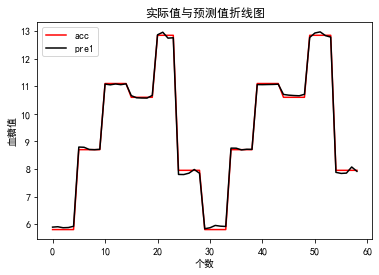

In [43]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据

#pre 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(pre1,color=(0,0,0),label="pre1") 
plt.xlabel("个数")  
plt.ylabel("血糖值") 
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [35]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score

In [44]:
print ('均方差',mean_squared_error(acc,pre1))
print ('绝对差',mean_absolute_error(acc,pre1))
print ('解释度',explained_variance_score(acc,pre1))
#print ('MAPE',mean_absolute_percentage_error(acc,pre))

均方差 0.006001566695665946
绝对差 0.06551920163268148
解释度 0.9988708990269478


In [40]:
print(acc)

0      5.80
1      5.80
2      5.80
3      5.80
4      5.80
5      8.70
6      8.70
7      8.70
8      8.70
9      8.70
10    11.10
11    11.10
12    11.10
13    11.10
14    11.10
15    10.60
16    10.60
17    10.60
18    10.60
19    10.60
20    12.85
21    12.85
22    12.85
23    12.85
24     7.95
25     7.95
26     7.95
27     7.95
28     7.95
29     5.80
30     5.80
31     5.80
32     5.80
33     5.80
34     8.70
35     8.70
36     8.70
37     8.70
38     8.70
39    11.10
40    11.10
41    11.10
42    11.10
43    11.10
44    10.60
45    10.60
46    10.60
47    10.60
48    10.60
49    12.85
50    12.85
51    12.85
52    12.85
53    12.85
54     7.95
55     7.95
56     7.95
57     7.95
58     7.95
Name: bloodG, dtype: float64


In [41]:
print(pre-1)

0      5.888623
1      5.902793
2      5.866483
3      5.873564
4      5.919020
5      8.794396
6      8.786301
7      8.706493
8      8.698132
9      8.713944
10    11.079564
11    11.052714
12    11.084378
13    11.058386
14    11.088241
15    10.660254
16    10.583401
17    10.574258
18    10.571657
19    10.668111
20    12.867284
21    12.961180
22    12.746881
23    12.760389
24     7.800797
25     7.797297
26     7.847404
27     7.979912
28     7.844820
29     5.830458
30     5.865921
31     5.949753
32     5.923391
33     5.912488
34     8.755226
35     8.753110
36     8.691174
37     8.714656
38     8.711020
39    11.061318
40    11.059137
41    11.063836
42    11.066985
43    11.075422
44    10.703981
45    10.678005
46    10.663804
47    10.655392
48    10.708677
49    12.772132
50    12.933897
51    12.973282
52    12.837985
53    12.784694
54     7.875906
55     7.837516
56     7.849144
57     8.071088
58     7.913304
Name: bloodG, dtype: float64


In [45]:
mape=np.abs((acc-pre1)/((acc+pre1)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.007828295953008196


In [46]:
print('percent:{:.2%}'.format(MAPE))

percent:0.78%


In [36]:
y_pred = np.array(pre)

In [37]:
print(y_true)

[ 317.3   290.8   235.6   173.2   118.8    93.     73.28   44.53    0.
  -80.    -80.    -80.    -80.    -80.    -80.    -80.    -80.    -80.
  -80.    -80.      0.     55.51   81.5    96.27  101.    126.    217.4
  248.6   240.    272.9   321.3   335.78  286.16  215.54  138.17   85.45
   52.44  -80.    -80.    -80.    -80.    -80.    -80.    -80.    -80.
  -80.    -80.    -80.    -80.    -80.    -80.    -80.    -80.    -80.
  -80.    -80.    -80.    -80.    -80.     55.     96.27  170.2   259.6
  364.4   394.    450.76  544.54  603.1   734.28  816.38  880.    942.69
  995.5  1021.34 1000.    985.    962.6   931.    922.42  893.82  924.36
  916.76  919.22  916.2   879.48  834.44  763.12  687.5   645.6   607.88
  570.8   560.    648.6   611.4   559.54  513.86]


In [46]:
print(pre)

0      316.683821
1      289.676916
2      233.639385
3      173.333700
4      117.030574
5       89.122923
6       72.010512
7       40.150409
8        0.077528
9      -77.118954
10     -77.262905
11     -78.080039
12     -79.426991
13     -78.943248
14     -77.368162
15     -77.392285
16     -77.379764
17     -77.570755
18     -79.453942
19     -77.912235
20      -0.094764
21      53.268921
22      77.546227
23      93.758955
24     100.817060
25     125.067047
26     215.525650
27     247.749631
28     239.379911
29     272.949221
30     321.070405
31     336.167115
32     285.645799
33     216.270558
34     136.589131
35      85.161276
36      49.484751
37     -79.876256
38     -80.155307
39     -78.988932
40     -78.816442
41     -78.170907
42     -78.112208
43     -78.285924
44     -79.279060
45     -78.886752
46     -78.145041
47     -78.674715
48     -79.161884
49     -79.150176
50     -79.048371
51     -78.949543
52     -78.466600
53     -79.137913
54     -80.358969
55     -78

In [53]:
mape0=np.mean(np.abs((acc-pre)/acc))*100

In [54]:
print(mape0)
#plt.plot(mape0,color="r",label="MAPE") #颜色表示


inf


In [58]:
y_pred1=np.round(y_pred)

In [59]:
print(y_pred1)

[425. 404. 380. ... 503. 472. 437.]


In [64]:
def mape(y_true, y_pred1):
    return np.mean(np.abs((y_pred1-y_true)/y_true))*100

def smape(y_true, y_pred1):
    return 2.0*np.mean(np.abs(y_pred1-y_true)/(np.abs(y_pred1)+np.abs(y_true)))*100


In [42]:
mape1=np.mean(np.abs((425.2326401 - 426) / 426)) * 100
print(mape1)

0.18013143192487652


In [ ]:
#smape,技术框架图,mae,mse;分母0-80，实际值，绝对值<100,可解释性方差，DARNN，Rmspe
#验证，测试集准确率% ，特征重要性，80训练-15验证-5测试（3.20-3.24）

In [50]:
print(X_test)

[[ 4.80000000e+00  6.97674419e+01  9.57378527e+01 ...  1.08333330e-02
   8.33333300e-03 -4.16666700e-03]
 [ 4.80000000e+00  6.84931507e+01  9.58756617e+01 ...  7.50000000e-03
  -2.75000000e-02 -4.50000000e-02]
 [ 4.80000000e+00  7.14285714e+01  9.58420718e+01 ...  3.08333330e-02
   6.66666700e-03 -2.66666670e-02]
 ...
 [ 6.95000000e+00  8.17120623e+01  9.61012767e+01 ...  4.33333330e-02
  -4.16666700e-03  2.50000000e-03]
 [ 6.95000000e+00  9.02255639e+01  9.55014270e+01 ...  3.33333330e-02
  -1.00000000e-02  8.33333000e-04]
 [ 6.95000000e+00  8.37209302e+01  9.58095950e+01 ...  2.25000000e-02
   1.00000000e-02 -3.00000000e-02]]
